In [1]:
import os
import sys
import requests
from datetime import datetime 
from multiprocessing import Pool
import numpy as  np
import pandas as pd
from pathlib import Path
import pickle
from tqdm import tqdm
from time import time
from typing import Dict, List, Optional
sys.path.append('../')
sys.path.append('../anmodel')
import matplotlib.pyplot as plt
import anmodel
import matplotlib
import scipy
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'

In [2]:
mnnan1=anmodel.models.FNANdmodel()
Sna=pd.read_csv("A.csv")
A=[]
c=1610
A.append(Sna["g_leak"][c]*0.6095)
A.append(Sna["g_leak"][c]*0.3905)
A.append(Sna['g_nav'][c])
A.append(Sna['g_kvhh'][c])
A.append(Sna['g_kva'][c])
A.append(Sna['g_kvsi'][c])
A.append(Sna['g_cav'][c])
A.append(Sna['g_kca'][c])
A.append(Sna['g_nap'][c])
A.append(Sna['g_kir'][c])
A.append(Sna['g_unav'][c])
A.append(Sna['g_kna'][c])
A.append(Sna['g_ampar'][c])
A.append(Sna['g_nmdar'][c])
A.append(Sna['g_gabar'][c])
A.append(Sna['t_ca'][c])
A.append(Sna['t_na'][c])
A.append(Sna['x_na'][c])
A.append(Sna['y_na'][c])


BBB=['g_lek', 'g_lena',  'g_nav', 'g_kvhh', 'g_kva', 'g_kvsi', 'g_cav', 'g_kca', 'g_nap', 'g_kir', 'g_unav', 'g_kna', 'g_ampar', 'g_nmdar', 'g_gabar', 't_ca', 't_na',  'x_na', 'y_na']
dic={key:  val for key, val in zip(BBB,A)}
#new_params: pd.DataFrame=pd.DataFrame.from_dict(dic,orient='index').T
new_params=dic

mnnan1.set_params(new_params)
s0,info=mnnan1.run_odeint()
fig=plt.figure()
plt.subplot(2,1,1)
plt.plot(s0[9999:,0])
plt.subplot(2,1,2)
plt.plot(s0[14999:,0])

KeyboardInterrupt: 

In [3]:
new_params

{'g_lek': 0.0247235209045,
 'g_lena': 0.0158400900955,
 'g_nav': 1.422098676,
 'g_kvhh': 72.12222201,
 'g_kva': 0.01332761,
 'g_kvsi': 0.239625682,
 'g_cav': 0.294154229,
 'g_kca': 0.205446971,
 'g_nap': 3.071575267,
 'g_kir': 0.020469817,
 'g_unav': 0.304654151,
 'g_kna': 10.06806462,
 'g_ampar': 0.023553782,
 'g_nmdar': 0.04138171,
 'g_gabar': 0,
 't_ca': 70.63624625,
 't_na': 3352.688071,
 'x_na': 18.4297867,
 'y_na': 34.85857952}

In [4]:
Sna["g_leak"][c]

0.040563611

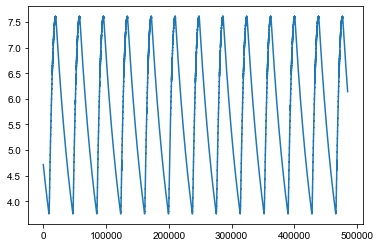

In [13]:
plt.plot(s0[14999:,10])

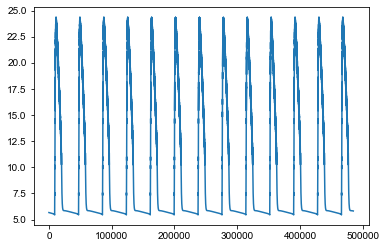

In [14]:
plt.plot(s0[14999:,9])

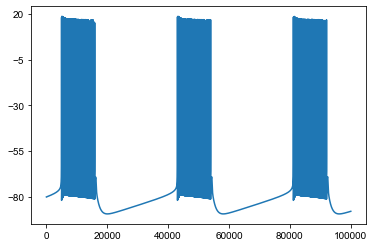

In [18]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(s0[400000:,0])
Z=np.linspace(-80,20, 5)
ax.set_yticks(Z)
plt.savefig("Fig5C1.pdf")

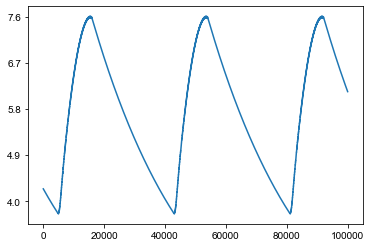

In [21]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(s0[400000:,10])
Z=np.linspace(4,7.6, 5)
ax.set_yticks(Z)
plt.savefig("Fig5C2.pdf")

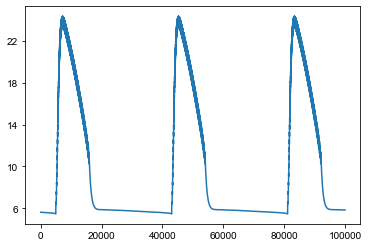

In [24]:
fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(s0[400000:,9])
Z=np.linspace(6,22, 5)
ax.set_yticks(Z)
plt.savefig("Fig5C3.pdf")

In [4]:
new_params

{'g_lek': 0.20096567968100001,
 'g_lena': 0.128756518319,
 'g_nav': 16.30822041,
 'g_kvhh': 10.25870432,
 'g_kva': 1.283240695,
 'g_kvsi': 0.03662354,
 'g_cav': 6.91280864,
 'g_kca': 0.348312606,
 'g_nap': 0.771027059,
 'g_kir': 0.015722023,
 'g_unav': 0.160859743,
 'g_kna': 11.30617791,
 'g_ampar': 0.192859701,
 'g_nmdar': 0.001702916,
 'g_gabar': 0,
 't_ca': 15.2077103,
 't_na': 1554.41548,
 'x_na': -10.34090221,
 'y_na': 31.82007669}

In [2]:
Model="NAN1.0"

if(Model=="NAN1.0"):
    mnnan1=anmodel.models.NAN10model()
if(Model=="NAN1.1"):
    mnnan1=anmodel.models.NAN11model()
if(Model=="NAN1.2"):
    mnnan1=anmodel.models.NAN12model()
if(Model=="NAN1.3"):
    mnnan1=anmodel.models.NAN13model()
if(Model=="NAN2.0"):
    mnnan1=anmodel.models.NAN20model()
if(Model=="NAN2.1"):
    mnnan1=anmodel.models.NAN21model()
if(Model=="SNAN"):
    mnnan1=anmodel.models.SNANmodel()
if(Model=="FNAN"):
    mnnan1=anmodel.models.FNANmodel()

In [ ]:
S=pd.read_csv("Sato.csv")

In [ ]:
if(Model=="NAN1.0"):
    x=len(S["g_kvhh"])
    for j in tqdm(range(x)):
        if j==0:
            continue    
        A=[]
        c=j
        A.append(S['g_kvhh'][c])
        A.append(S['g_unav'][c])
        A.append(S['g_kna'][c])
        A.append(S['g_leak'][c])
        A.append(S['g_cav'][c])
        A.append(S['x_na'][c])
        A.append(S['y_na'][c])
        A.append(S['t_na'][c])

        ss1=A[7]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[7]=ss3
        
        ss1=A[6]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[6]=ss3


        ss1=A[5]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[5]=ss3


        BBB=['g_kvhh', 'g_unav', 'g_kna', 'g_leak','g_cav', 'x_na', 'y_na', 't_na']
        dic={key:  val for key, val in zip(BBB,A)}
        #new_params: pd.DataFrame=pd.DataFrame.from_dict(dic,orient='index').T
        new_params=dic

        mnnan1.set_params(new_params)
        s,info=mnnan1.run_odeint()
        fig=plt.figure()
        plt.subplot(2,1,1)
        plt.plot(s[9999:,0])
        plt.title("{}" .format(j))
        plt.subplot(2,1,2)
        plt.plot(s[14999:,0])
        plt.title("{}" .format(j))
        fig.savefig("{}.png" .format(j))
        
        
if(Model=="NAN1.1"):
    x=len(S["g_kvhh"])
    for j in tqdm(range(x)):
        if j==0:
            continue    
        A=[]
        c=j
        A.append(S['g_kvhh'][c])
        A.append(S['g_unav'][c])
        A.append(S['g_kna'][c])
        A.append(S['g_leak'][c])
        A.append(S['x_na'][c])
        A.append(S['y_na'][c])
        A.append(S['t_na'][c])

        ss1=A[4]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[4]=ss3


        ss1=A[5]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[5]=ss3

        ss1=A[6]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[6]=ss3
        
        
        BBB=['g_kvhh', 'g_unav', 'g_kna', 'g_leak','g_cav', 'x_na', 'y_na', 't_na']
        dic={key:  val for key, val in zip(BBB,A)}
        #new_params: pd.DataFrame=pd.DataFrame.from_dict(dic,orient='index').T
        new_params=dic

        mnnan1.set_params(new_params)
        s,info=mnnan1.run_odeint()
        fig=plt.figure()
        plt.subplot(2,1,1)
        plt.plot(s[9999:,0])
        plt.title("{}" .format(j))
        plt.subplot(2,1,2)
        plt.plot(s[14999:,0])
        plt.title("{}" .format(j))
        fig.savefig("{}.png" .format(j))
    
if(Model=="NAN1.2"):
    x=len(S["g_kvhh"])
    for j in tqdm(range(x)):
        if j==0:
            continue    
        A=[]
        c=j
        A.append(S['g_kvhh'][c])
        A.append(S['g_unav'][c])
        A.append(S['g_kna'][c])
        A.append(S['g_leak'][c])
        A.append(S['g_nav'][c])
        A.append(S['x_na'][c])
        A.append(S['y_na'][c])
        A.append(S['t_na'][c])

        ss1=A[7]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[7]=ss3
        
        ss1=A[6]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[6]=ss3


        ss1=A[5]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[5]=ss3


        BBB=['g_kvhh', 'g_unav', 'g_kna', 'g_leak','g_nav', 'x_na', 'y_na', 't_na']
        dic={key:  val for key, val in zip(BBB,A)}
        #new_params: pd.DataFrame=pd.DataFrame.from_dict(dic,orient='index').T
        new_params=dic

        mnnan1.set_params(new_params)
        s,info=mnnan1.run_odeint()
        fig=plt.figure()
        plt.subplot(2,1,1)
        plt.plot(s[9999:,0])
        plt.title("{}" .format(j))
        plt.subplot(2,1,2)
        plt.plot(s[14999:,0])
        plt.title("{}" .format(j))
        fig.savefig("{}.png" .format(j))
    
if(Model=="NAN1.3"):
    x=len(S["g_kvhh"])
    for j in tqdm(range(x)):
        if j==0:
            continue    
        A=[]
        c=j
        A.append(S['g_kvhh'][c])
        A.append(S['g_unavy'][c])
        A.append(S['g_kna'][c])
        A.append(S['g_leak'][c])
        A.append(S['g_cav'][c])
        A.append(S['y_na'][c])
        A.append(S['t_na'][c])
        
        ss1=A[6]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[6]=ss3


        ss1=A[5]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[5]=ss3


        BBB=['g_kvhh', 'g_unavy', 'g_kna', 'g_leak','g_cav', 'y_na', 't_na']
        dic={key:  val for key, val in zip(BBB,A)}
        #new_params: pd.DataFrame=pd.DataFrame.from_dict(dic,orient='index').T
        new_params=dic

        mnnan1.set_params(new_params)
        s,info=mnnan1.run_odeint()
        fig=plt.figure()
        plt.subplot(2,1,1)
        plt.plot(s[9999:,0])
        plt.title("{}" .format(j))
        plt.subplot(2,1,2)
        plt.plot(s[14999:,0])
        plt.title("{}" .format(j))
        fig.savefig("{}.png" .format(j))
    
if(Model=="NAN2.0"):
    x=len(S["g_kvhh"])
    for j in tqdm(range(x)):
        if j==0:
            continue    
        A=[]
        c=j
        A.append(S['g_kvhh'][c])
        A.append(S['g_unav'][c])
        A.append(S['g_nak'][c])
        A.append(S['g_leak'][c])
        A.append(S['g_cav'][c])
        A.append(S['x_na'][c])
        A.append(S['y_na'][c])

        ss1=A[6]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[6]=ss3


        ss1=A[5]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[5]=ss3


        BBB=['g_kvhh', 'g_unav', 'g_nak', 'g_leak','g_cav', 'x_na', 'y_na']
        dic={key:  val for key, val in zip(BBB,A)}
        #new_params: pd.DataFrame=pd.DataFrame.from_dict(dic,orient='index').T
        new_params=dic

        mnnan1.set_params(new_params)
        s,info=mnnan1.run_odeint()
        fig=plt.figure()
        plt.subplot(2,1,1)
        plt.plot(s[9999:,0])
        plt.title("{}" .format(j))
        plt.subplot(2,1,2)
        plt.plot(s[14999:,0])
        plt.title("{}" .format(j))
        fig.savefig("{}.png" .format(j))
    
if(Model=="NAN2.1"):
    x=len(S["g_kvhh"])
    for j in tqdm(range(x)):
        if j==0:
            continue    
        A=[]
        c=j
        A.append(S['g_kvhh'][c])
        A.append(S['g_unav'][c])
        A.append(S['g_nak'][c])
        A.append(S['g_leak'][c])
        A.append(S['g_cav'][c])
        A.append(S['g_kna'][c])
        A.append(S['x_na'][c])
        A.append(S['y_na'][c])

        ss1=A[6]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[6]=ss3


        ss1=A[7]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[7]=ss3


        BBB=['g_kvhh', 'g_unav', 'g_nak', 'g_leak','g_cav', 'g_kna', 'x_na', 'y_na']
        dic={key:  val for key, val in zip(BBB,A)}
        #new_params: pd.DataFrame=pd.DataFrame.from_dict(dic,orient='index').T
        new_params=dic

        mnnan1.set_params(new_params)
        s,info=mnnan1.run_odeint()
        fig=plt.figure()
        plt.subplot(2,1,1)
        plt.plot(s[9999:,0])
        plt.title("{}" .format(j))
        plt.subplot(2,1,2)
        plt.plot(s[14999:,0])
        plt.title("{}" .format(j))
        fig.savefig("{}.png" .format(j))
    
if(Model=="SNAN"):
    x=len(S["g_kvhh"])
    for j in tqdm(range(x)):
        if j==0:
            continue    
        A=[]
        c=j
        A.append(S['g_kvhh'][c])
        A.append(S['g_unav'][c])
        A.append(S['g_kna'][c])
        A.append(S['g_leak'][c])
        A.append(S['g_cav'][c])
        A,append(S['g_kca'][c])
        A.append(S['x_na'][c])
        A.append(S['y_na'][c])
        A.append(S['t_na'][c])
        A.append(S['t_ca'][c])

        ss1=A[7]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[7]=ss3
        
        ss1=A[6]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[6]=ss3


        ss1=A[8]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[8]=ss3

        ss1=A[9]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[9]=ss3

        BBB=['g_kvhh', 'g_unav', 'g_kna', 'g_leak','g_cav', 'g_kca', 'x_na', 'y_na', 't_na', 't_ca']
        dic={key:  val for key, val in zip(BBB,A)}
        #new_params: pd.DataFrame=pd.DataFrame.from_dict(dic,orient='index').T
        new_params=dic

        mnnan1.set_params(new_params)
        s,info=mnnan1.run_odeint()
        fig=plt.figure()
        plt.subplot(2,1,1)
        plt.plot(s[9999:,0])
        plt.title("{}" .format(j))
        plt.subplot(2,1,2)
        plt.plot(s[14999:,0])
        plt.title("{}" .format(j))
        fig.savefig("{}.png" .format(j))
    
if(Model=="FNAN"):
    x=len(S["g_kvhh"])
    for j in tqdm(range(x)):
        if j==0:
            continue    
        A=[]
        c=j
        A.append(S['g_leak'][c])
        A.append(S['g_nav'][c])
        A.append(S['g_kvhh'][c])
        A.append(S['g_kva'][c])
        A.append(S['g_kvsi'][c])
        A.append(S['g_cav'][c])
        A.append(S['g_kca'][c])
        A.append(S['g_nap'][c])
        A.append(S['g_kir'][c])
        A.append(S['g_unav'][c])
        A.append(S['g_kna'][c])
        A.append(S['g_ampar'][c])
        A.append(S['g_nmdar'][c])
        A.append(S['g_gabar'][c])
        A.append(S['t_ca'][c])
        A.append(S['t_na'][c])
        A.append(S['x_na'][c])
        A.append(S['y_na'][c])

        ss1=A[14]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[14]=ss3
        
        ss1=A[16]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[16]=ss3


        ss1=A[15]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[15]=ss3

        ss1=A[17]
        ss2=""
        sss2=""
        ssss2=""
        for i in range(len(ss1)):
            if(i==0 or i==len(ss1)-1):
                continue
            ss2=ss2+ss1[i]
        ss3=float(ss2)
        A[17]=ss3
        
        BBB=['g_leak', 'g_nav', 'g_kvhh', 'g_kva', 'g_kvsi', 'g_cav', 'g_kca', 'g_nap', 'g_kir', 'g_unav', 'g_kna', 'g_ampar', 'g_nmdar', 'g_gabar', 't_ca', 't_na', 'x_na', 'y_na']
        dic={key:  val for key, val in zip(BBB,A)}
        #new_params: pd.DataFrame=pd.DataFrame.from_dict(dic,orient='index').T
        new_params=dic

        mnnan1.set_params(new_params)
        s,info=mnnan1.run_odeint()
        fig=plt.figure()
        plt.subplot(2,1,1)
        plt.plot(s[9999:,0])
        plt.title("{}" .format(j))
        plt.subplot(2,1,2)
        plt.plot(s[14999:,0])
        plt.title("{}" .format(j))
        fig.savefig("{}.png" .format(j))
